# Machine Learning 1, Übung 1
(c) 2023 by Harald Bögeholz

Der unten stehende Code erzeugt einige pseudo-zufällige Datenpunkte. Sehen Sie sich die Inhalte der Variablen an.

In [1]:
import numpy as np

np.random.seed(42)
m = 20
x = np.random.rand(m) * 10
y = 3.5 * x + 10 + np.random.randn(m) * 5
x

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ])

In [2]:
y

array([18.04474856, 44.84623739, 31.07966759, 23.89152844, 22.78889626,
       14.33092671, 12.37056745, 33.19242417, 28.31711179, 35.33715317,
        4.96548941, 45.82533492, 36.13229898, 15.97340012, 13.35534079,
       25.68054877, 20.58099238, 23.07792046, 29.23080021, 14.08880166])

Ein paar Zeilen Code zur Vorbereitung des Folgenden:

In [3]:
import math
import matplotlib.pyplot as plt

linX = np.array([0,10])
y_range = max(y) - min(y)
y_min = min(y) - 0.1 * y_range
y_max = max(y) + 0.1 * y_range

Die folgenden Werte sind von Hand geschätzt:

In [4]:
theta_0 = 3
theta_1 = 5

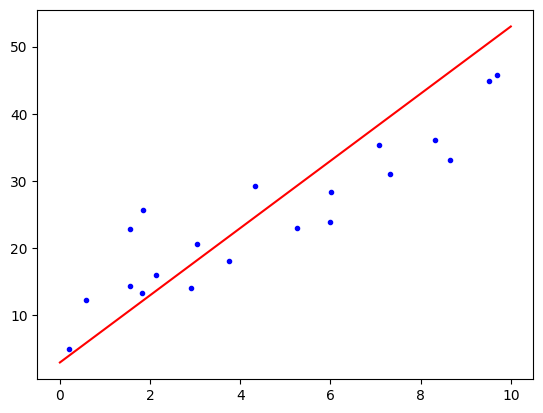

In [5]:
plt.plot(x,y,"b.")
plt.plot(linX, theta_0+linX*theta_1, "r-")

Der Vektor `x` enthält die Eingabedaten

In [6]:
x

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ])

Der Vektor `y` enthält die zugehörigen Ausgabedaten:

In [7]:
y

array([18.04474856, 44.84623739, 31.07966759, 23.89152844, 22.78889626,
       14.33092671, 12.37056745, 33.19242417, 28.31711179, 35.33715317,
        4.96548941, 45.82533492, 36.13229898, 15.97340012, 13.35534079,
       25.68054877, 20.58099238, 23.07792046, 29.23080021, 14.08880166])

Das lineare Modell liefert folgende Werte (man beachte: numpy kann einen Vektor `x` mit einer Zahl `theta_1` komponentenweise multiplizieren)

In [8]:
theta_0 + x * theta_1

array([21.72700594, 50.53571532, 39.59969709, 32.93292421, 10.80093202,
       10.79972602,  5.90418061, 46.30880729, 33.05575059, 38.40362889,
        4.02922471, 51.49549261, 44.62213204, 13.61695553, 12.09124836,
       12.17022549, 18.21211215, 29.23782158, 24.59725093, 17.56145701])

Der Fehler ist die Differenz zwischen dem Modell und den tatsächlichen Werten in `y`. Es gibt positive und negative Abweichungen (die Gerade verläuft über oder unter den Datenpunkten)

In [9]:
theta_0 + x * theta_1 - y

array([  3.68225738,   5.68947793,   8.5200295 ,   9.04139577,
       -11.98796424,  -3.53120069,  -6.46638684,  13.11638312,
         4.7386388 ,   3.06647572,  -0.9362647 ,   5.67015769,
         8.48983306,  -2.35644459,  -1.26409243, -13.51032327,
        -2.36888023,   6.15990112,  -4.63354928,   3.47265535])

Wir quadrieren den Fehler. Dann sind alle Werte positiv.

In [10]:
(theta_0 + x * theta_1 - y) ** 2

array([ 13.55901944,  32.37015915,  72.59090276,  81.74683746,
       143.71128657,  12.46937833,  41.81415878, 172.03950609,
        22.45469767,   9.40327333,   0.87659159,  32.15068824,
        72.07726541,   5.55283111,   1.59792967, 182.52883499,
         5.61159355,  37.9443818 ,  21.46977894,  12.0593352 ])

So können wir den mittleren quadratischen Fehler (MSE) berechnen:

In [11]:
np.sum((theta_0 + x * theta_1 - y) ** 2) / m

48.701422504276714

In [12]:
X = np.c_[np.ones(m), x]
X

array([[1.        , 3.74540119],
       [1.        , 9.50714306],
       [1.        , 7.31993942],
       [1.        , 5.98658484],
       [1.        , 1.5601864 ],
       [1.        , 1.5599452 ],
       [1.        , 0.58083612],
       [1.        , 8.66176146],
       [1.        , 6.01115012],
       [1.        , 7.08072578],
       [1.        , 0.20584494],
       [1.        , 9.69909852],
       [1.        , 8.32442641],
       [1.        , 2.12339111],
       [1.        , 1.81824967],
       [1.        , 1.8340451 ],
       [1.        , 3.04242243],
       [1.        , 5.24756432],
       [1.        , 4.31945019],
       [1.        , 2.9122914 ]])

In [13]:
X.T @ X

array([[ 20.        ,  91.54045768],
       [ 91.54045768, 598.85806554]])

In [14]:
theta_best = np.linalg.inv(X.T @ X) @ X.T @ y
theta_0, theta_1 = theta_best
theta_best

array([9.81802502, 3.24173263])

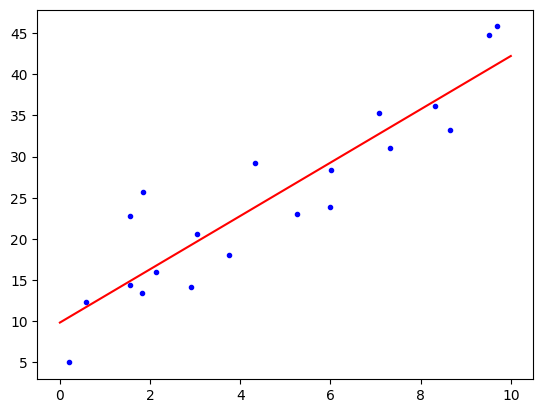

In [15]:
plt.plot(x,y,"b.")
plt.plot(linX, theta_0+linX*theta_1, "r-")

In [16]:
np.sum((theta_0 + x * theta_1 - y) ** 2) / m

19.385233111742174

In [17]:
y

array([18.04474856, 44.84623739, 31.07966759, 23.89152844, 22.78889626,
       14.33092671, 12.37056745, 33.19242417, 28.31711179, 35.33715317,
        4.96548941, 45.82533492, 36.13229898, 15.97340012, 13.35534079,
       25.68054877, 20.58099238, 23.07792046, 29.23080021, 14.08880166])

In [18]:
y_avg = np.sum(y) / m
y_avg

24.655509461279415

In [19]:
(y - y_avg)**2

array([ 43.70215972, 407.66549418,  41.26980761,   0.583667  ,
         3.48424484, 106.597009  , 150.91980024,  72.87891276,
        13.4073316 , 114.09751235, 387.69688949, 448.16150984,
       131.71669762,  75.37902253, 127.69381197,   1.05070558,
        16.60168945,   2.48878705,  20.93328546, 111.65531382])

Der R^2-Wert errechnet sich nach der Formel in der Präsentation.

In [20]:
1 - np.sum((theta_0 + x * theta_1 - y) ** 2) / np.sum((y - y_avg)**2)

0.829803580077148

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
x

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ])

In [24]:
X = x.reshape(m,1)
X

array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ],
       [1.5599452 ],
       [0.58083612],
       [8.66176146],
       [6.01115012],
       [7.08072578],
       [0.20584494],
       [9.69909852],
       [8.32442641],
       [2.12339111],
       [1.81824967],
       [1.8340451 ],
       [3.04242243],
       [5.24756432],
       [4.31945019],
       [2.9122914 ]])

In [25]:
model.fit(X, y)

LinearRegression()

In [26]:
model.coef_

array([3.24173263])

In [27]:
model.intercept_

9.818025015001554

Die Funktion `predict()` wendet das Modell auf die angegebenen Daten an. Hier setzen wir unseren ursprünglichen Datensatz `X` ein:

In [28]:
model.predict(X)

array([21.95961427, 40.63764094, 33.5473115 , 29.22493246, 14.8757322 ,
       14.87495029, 11.70094043, 37.89713979, 29.30456651, 32.77184484,
       10.48531928, 41.25990921, 36.80358976, 16.70149126, 15.71230431,
       15.76350886, 19.68074509, 26.8292255 , 23.82052764, 19.25889509])

Das Ergebnis ist dasselbe wie wir es vorher "von Hand" ausgerechnet haben:

In [29]:
theta_0 + theta_1 * x

array([21.95961427, 40.63764094, 33.5473115 , 29.22493246, 14.8757322 ,
       14.87495029, 11.70094043, 37.89713979, 29.30456651, 32.77184484,
       10.48531928, 41.25990921, 36.80358976, 16.70149126, 15.71230431,
       15.76350886, 19.68074509, 26.8292255 , 23.82052764, 19.25889509])

In [30]:
model.predict(np.array([[4]]))

array([22.78495555])

In [31]:
y_hat = model.predict(X)

Für den R^2-Wert gibt es in scikit-learn auch eine vorgefertigte Funktion:

In [32]:
from sklearn.metrics import r2_score
r2_score(y, y_hat)

0.829803580077148